In [3]:
import pandas as pd
data_path = 'data.csv'  # Replace with your dataset path
data = pd.read_csv(data_path)

data['new_speed'] = data['new_speed'].astype(int)



In [4]:
data.new_speed.unique()


array([0, 2, 3, 4, 5, 1])

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models

# Load the dataset


# Define features and target
features = ['year', 'month', 'day', 'hour', 'minutes', 'temperature', 'humidity']
target = 'new_speed'


X = data[features]
y = data[target]

# Check the unique values in y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to one-hot encoding
  # Make sure it includes all classes from 0 to the highest value in y
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Build the ANN model
model = Sequential([
    Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(6, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train_scaled, y_train_one_hot, epochs=150, batch_size=32, validation_data=(X_test_scaled, y_test_one_hot))

# Predict on the test data
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)
model.save('model.h5')




Epoch 1/150
1465/1465 [==============================] - 4s 2ms/step - loss: 0.7054 - accuracy: 0.7243 - val_loss: 0.5519 - val_accuracy: 0.7838
Epoch 2/150
1465/1465 [==============================] - 3s 2ms/step - loss: 0.5107 - accuracy: 0.8040 - val_loss: 0.4720 - val_accuracy: 0.8166
Epoch 3/150
1465/1465 [==============================] - 3s 2ms/step - loss: 0.4427 - accuracy: 0.8338 - val_loss: 0.4102 - val_accuracy: 0.8419
Epoch 4/150
1465/1465 [==============================] - 3s 2ms/step - loss: 0.4034 - accuracy: 0.8538 - val_loss: 0.3845 - val_accuracy: 0.8692
Epoch 5/150
1465/1465 [==============================] - 3s 2ms/step - loss: 0.3798 - accuracy: 0.8679 - val_loss: 0.3611 - val_accuracy: 0.8760
Epoch 6/150
1465/1465 [==============================] - 3s 2ms/step - loss: 0.3663 - accuracy: 0.8746 - val_loss: 0.3511 - val_accuracy: 0.8738
Epoch 7/150
1465/1465 [==============================] - 3s 2ms/step - loss: 0.3531 - accuracy: 0.8811 - val_loss: 0.3447 - val_ac

c:\Users\umer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3078: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


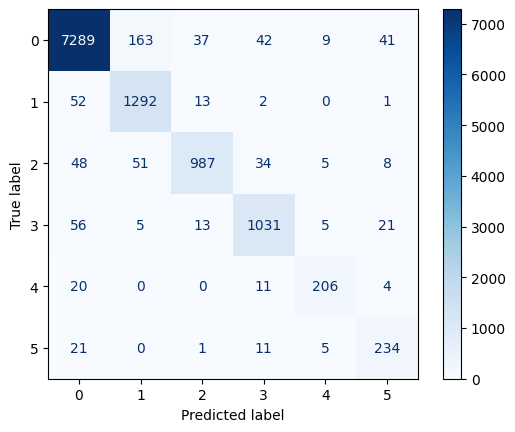

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      7581
           1       0.86      0.95      0.90      1360
           2       0.94      0.87      0.90      1133
           3       0.91      0.91      0.91      1131
           4       0.90      0.85      0.87       241
           5       0.76      0.86      0.81       272

    accuracy                           0.94     11718
   macro avg       0.89      0.90      0.89     11718
weighted avg       0.94      0.94      0.94     11718



In [10]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))

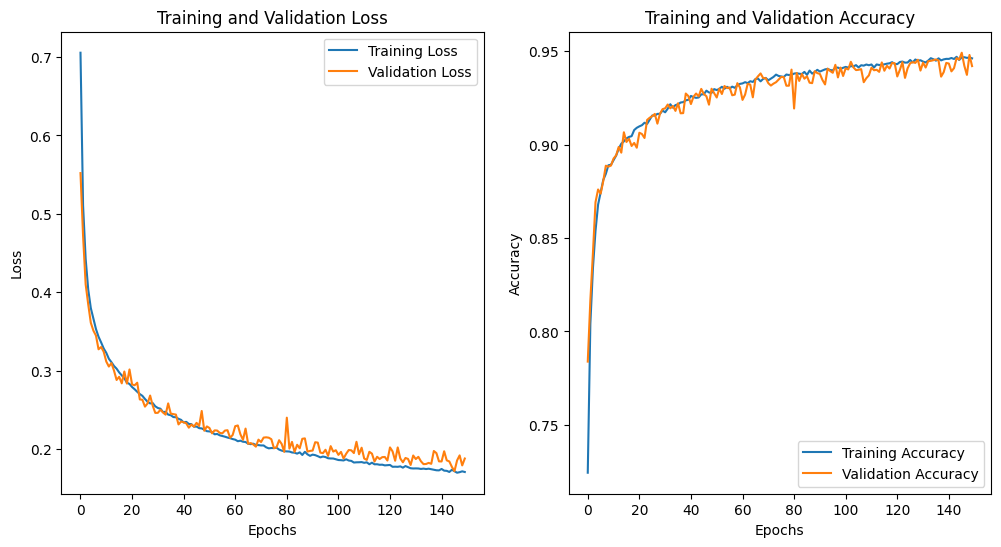

In [11]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from itertools import product

# Define the model path
model_path = 'model.h5'

# Define the feature ranges for 2024
year = [2024]
months = np.arange(1, 13)
days = np.arange(1, 32)
hours = np.arange(0, 24)
minutes = np.arange(0, 60, 15)
temperatures = np.linspace(1, 45, 45)
humidities = np.linspace(0, 100, 101)

# Create a sample dataframe to fit the scaler
sample_data = pd.DataFrame(list(product(year, months, days, hours, minutes, temperatures, humidities)),
                           columns=['year', 'month', 'day', 'hour', 'minutes', 'temperature', 'humidity'])

# Fit the scaler on this sample data
scaler = StandardScaler().fit(sample_data)

# Batch size
batch_size = 10  # Adjust based on memory capacity

# Create a generator for the combinations
def combination_generator(year, months, days, hours, minutes, temperatures, humidities):
    for combination in product(year, months, days, hours, minutes, temperatures, humidities):
        yield combination

# Load the model
model = load_model('model.h5')
# Process data in batches
def process_batches(generator, batch_size, scaler, model, output_file):
    batch = []
    for combination in generator:
        batch.append(combination)
        if len(batch) == batch_size:
            process_batch(batch, scaler, model, output_file)
            batch = []
    if batch:
        process_batch(batch, scaler, model, output_file)

def process_batch(batch, scaler, model, output_file):
    df_batch = pd.DataFrame(batch, columns=['year', 'month', 'day', 'hour', 'minutes', 'temperature', 'humidity'])
    df_batch['date'] = pd.to_datetime(df_batch[['year', 'month', 'day']], errors='coerce')
    df_batch = df_batch.dropna(subset=['date']).drop(columns=['date'])
    X_batch = df_batch[['year', 'month', 'day', 'hour', 'minutes', 'temperature', 'humidity']]
    X_batch_scaled = scaler.transform(X_batch)
    predictions = model.predict(X_batch_scaled)
    df_batch['predicted_new_speed'] = np.argmax(predictions, axis=1)
    df_batch.to_csv(output_file, mode='a', index=False, header=False)

# Initialize output file with header
output_file = 'predictions_2024.csv'
pd.DataFrame(columns=['year', 'month', 'day', 'hour', 'minutes', 'temperature', 'humidity', 'predicted_new_speed']).to_csv(output_file, index=False)

# Run the batch processing
combinations_gen = combination_generator(year, months, days, hours, minutes, temperatures, humidities)
process_batches(combinations_gen, batch_size, scaler, model, output_file)

print(f"Predictions saved to {output_file}")


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [1]:
year = 1
months = 12
days = 31
hours = 24
minutes = 60  
temperatures = 33
humidities = 100

total_combinations = year * months * days * hours * minutes * temperatures * humidities
print(f"Total data points: {total_combinations}")
#One billion, seven hundred sixty-seven million, seven hundred forty-four thousand.

Total data points: 1767744000


In [33]:
data['humidity'].min(),data['humidity'].max(),data['temperature'].min(),data['temperature'].max()

(10.0, 83.0, 20.0, 37.0)

In [2]:
import pandas as pd
import numpy as np
from itertools import product

# Define the feature ranges
year = [2024]
months = np.arange(1, 13)
days = np.arange(1, 32)
hours = np.arange(1, 25)
minutes = np.arange(1, 61)  # 1 to 60 minutes
temperatures = np.linspace(10, 42, 33)  # 33 steps from 10 to 42
humidities = np.linspace(1, 100, 100)  # 100 steps from 1 to 100

# Batch size
batch_size = 100000  # Adjust based on memory capacity

# Define a generator for the combinations
def combination_generator(year, months, days, hours, minutes, temperatures, humidities):
    for combination in product(year, months, days, hours, minutes, temperatures, humidities):
        yield combination

# Function to process a batch and save to CSV
def process_batch(generator, batch_size, output_file):
    batch = []
    for combination in generator:
        batch.append(combination)
        if len(batch) == batch_size:
            write_batch_to_csv(batch, output_file)
            batch = []
    if batch:  # Process the last batch
        write_batch_to_csv(batch, output_file)

# Function to write a batch to CSV
def write_batch_to_csv(batch, output_file):
    df_batch = pd.DataFrame(batch, columns=['year', 'month', 'day', 'hour', 'minutes', 'temperature', 'humidity'])
    df_batch.to_csv(output_file, mode='a', index=False, header=False)

# Initialize output file with header
output_file = 'feature_combinations.csv'
pd.DataFrame(columns=['year', 'month', 'day', 'hour', 'minutes', 'temperature', 'humidity']).to_csv(output_file, index=False)

# Create the combination generator
combinations_gen = combination_generator(year, months, days, hours, minutes, temperatures, humidities)

# Process the combinations in batches
process_batch(combinations_gen, batch_size, output_file)

print(f"Combinations saved to {output_file}")


OSError: [Errno 28] No space left on device

In [3]:
import pandas as pd
d=pd.read_csv('feature_combinations.csv')

In [ ]:
ds